In [1]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn
import pandas

In [2]:
%matplotlib inline

In [3]:
lam = np.arange(400e-9,2000e-9,1e-9) # Wavelength range in m

In [4]:
lam

array([4.000e-07, 4.010e-07, 4.020e-07, ..., 1.997e-06, 1.998e-06,
       1.999e-06])

In [5]:
nlam = lam * 1e9 # Wavelength range in nm
nlam

array([ 400.,  401.,  402., ..., 1997., 1998., 1999.])

In [6]:
d = 85e-9 # Film thickness

In [7]:
kl = 2*np.pi/lam # wavenumber in vacuum

In [8]:
kl

array([15707963.26794897, 15668791.28972465, 15629814.19696414, ...,
        3146312.1217724 ,  3144737.39098072,  3143164.23570759])

In [9]:
nr = 1 # Refractive index of the substrate, Suspended membrane

In [10]:
kr = 2*np.pi*nr/lam # wavenumber of the em field in the substrate
kr

array([15707963.26794897, 15668791.28972465, 15629814.19696414, ...,
        3146312.1217724 ,  3144737.39098072,  3143164.23570759])

In [11]:
nload = pandas.read_csv('cSi_n_m.txt',delimiter = '\t') #Load n for the film
lamb = nload['Wavelength'] # wavelength
nfilm = nload['n'] # n for the film

kload = pandas.read_csv('cSi_k_m.txt',delimiter = '\t') #Load k for the film
kfilm = kload['k'] # k for the film

nint = np.interp(lam,lamb,nfilm)
kint = np.interp(lam,lamb,kfilm)
N = nint + 1j * kint # complex refractive index of the film
#pp.plot(lam,nint)
#pp.plot(lam,kint)
#pp.axis(400e-9, 1600e-9, 2.5, 3.8)

In [12]:
k = 2*N*np.pi/lam # Wavenumber inside the thin film
k

array([88325877.45567702+5.12079603e+06j,
       87663753.50775146+4.97484123e+06j,
       87004923.70882058+4.82961259e+06j, ...,
       10971190.36862035+3.42948021e-07j,
       10965699.28234977+3.42776376e-07j,
       10960213.68991237+3.42604902e-07j])

In [13]:
for lam in np.nditer(lam):  # calculation of transmission and reflection coefficients
        
    M0 = np.cos(k*d)
    M1 = 1/k*np.sin(k*d)
    M2 = -k*np.sin(k*d)
    
    t2 = 2*1j*kl*np.exp(-1j*kr*d)*(M0*M0-M1*M2)/(-M2+kl*kr*M1+1j*(kr*M0+kl*M0))
    r2 = (M2+kl*kr*M1+1j*((kl-kr)*M0))/(-M2+kl*kr*M1+1j*((kl+kr)*M0))

Text(0,0.5,'RTA')

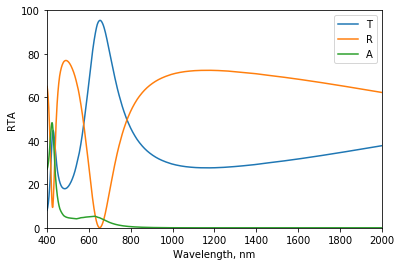

In [14]:
T = np.square(np.absolute(t2))*100
R = np.square(np.absolute(r2))*100
A = 100 - (T + R)
pp.plot(nlam,T)  # plot transmission
pp.plot(nlam,R) # plot reflection
pp.plot(nlam,A) # plot absorption
pp.axis([400,2000,0,100])
pp.legend(['T','R','A'])
pp.xlabel('Wavelength, nm')
pp.ylabel('RTA')

In [15]:
nload.head()

,Wavelength,n
0,2.500000e-07,1.637
1,2.600000e-07,1.737
2,2.700000e-07,2.030
3,2.800000e-07,2.840
4,2.900000e-07,4.185


In [16]:
np.savetxt('Transmission_85nm_Si.txt', T)
np.savetxt('Reflection_85nm_Si.txt', R)
np.savetxt('Wavelength.txt', nlam)